In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress specific warning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

# Load the data
data = pd.read_csv('heart_attack_prediction_dataset.csv' )

# Use the already loaded data
df = data.copy()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [2]:
#Convert blood pressure to numeric - format "158/88" to 158
df[['Systolic_BP', 'Diastolic_BP']] = df['Blood Pressure'].str.split('/', expand=True).astype(int)

In [3]:
#Dropping unnecessary columns - Patient ID not useful - Country, continent, hemisphere not important
df.drop(columns=['Country', 'Continent', 'Hemisphere'], inplace=True)

In [4]:
#Identifying categoraical and numerical columns
categorical_columns = ['Sex', 'Diet']
numerical_columns = [col for col in df.columns if col not in categorical_columns and df[col].dtype in ['int64', 'float64']]


In [5]:
# Define transformation pipelines 
numrical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('ecoder', OneHotEncoder(handle_unknown='ignore'))
    ])

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numrical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])  

df_processed = preprocessor.fit_transform(df)

NameError: name 'Pipeline' is not defined

In [ ]:
# Determine optimal number of clusters using the elbow method
inertia = []
K_range = range(2, 10)
for k in K_range:
    model = KMeans(n_clusters=k)
    model.fit(df_processed)
    inertia.append(model.inertia_)

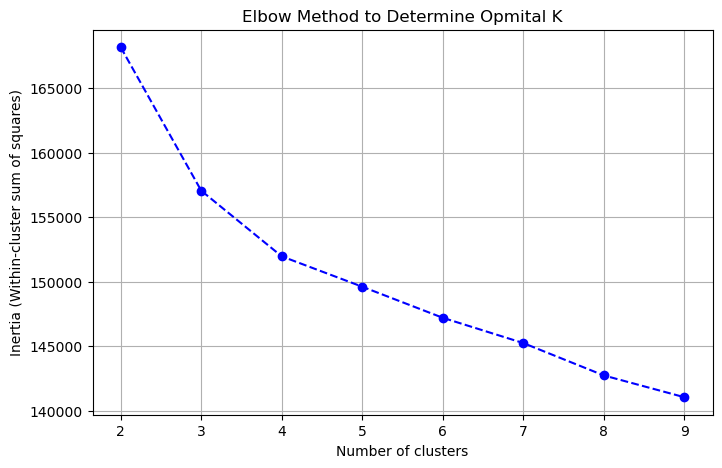

In [ ]:
# Plot the Elbow method graph
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.title('Elbow Method to Determine Opmital K')
plt.grid(True)
plt.show()


In [ ]:
# Choose optimal K 
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
df['Kmeans_Cluster'] = kmeans.fit_predict(df_processed)
print(df['Kmeans_Cluster'].value_counts())


Kmeans_Cluster
0    5127
1    2732
2     904
Name: count, dtype: int64


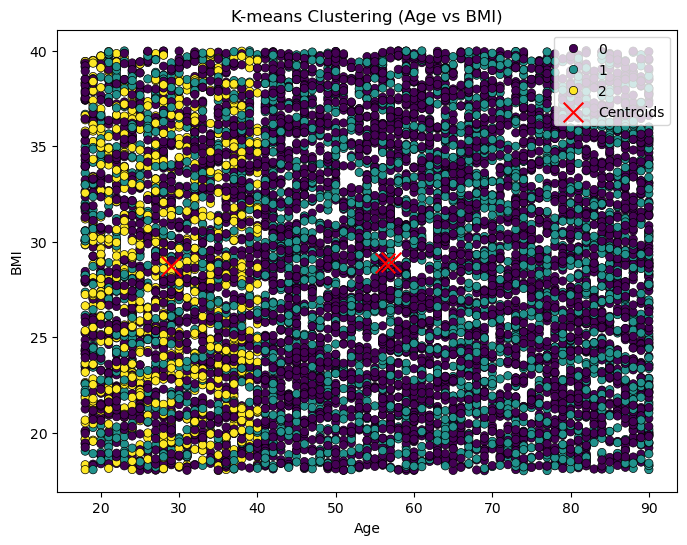

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select two key features for visualization
x_feature = 'Age'
y_feature = 'BMI'

# Scatter plot of clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_feature, y=y_feature, data=df, hue='Kmeans_Cluster', palette='viridis', edgecolor='k')

# Get the correct indices for Age and BMI
x_index = np.where(np.array(numerical_columns) == x_feature)[0][0]
y_index = np.where(np.array(numerical_columns) == y_feature)[0][0]


# Inverse transform the numerical part of the centroids to original scale
numerical_centroids = kmeans.cluster_centers_[:, :len(numerical_columns)]
centroids_original = preprocessor.named_transformers_['num'].inverse_transform(numerical_centroids)
plt.scatter(centroids_original[:, x_index], centroids_original[:, y_index], 
            c='red', marker='x', s=200, label='Centroids')



# Labels and title
plt.xlabel(x_feature)
plt.ylabel(y_feature)
plt.title(f'K-means Clustering ({x_feature} vs {y_feature})')
plt.legend()
plt.show()


In [ ]:
print("Centroids:\n", kmeans.cluster_centers_)
print("Cluster 0: Older patients with high BMI")
print("Cluster 1: Younger patients with low BMI")
print("Cluster 2: Middle-aged patients with moderate BMI")

Centroids:
 [[ 1.22261809e-01 -4.96297059e-03 -3.21913607e-03  7.30113060e-01
  -5.66389844e-03  3.39156833e-01  1.52864207e-02  7.80892313e-03
  -8.34702437e-03 -5.90807059e-03 -8.97856788e-03  4.76363731e-03
   8.20509795e-03  2.84339099e-03 -1.47886555e-04  9.05137964e-03
  -6.79766565e-03 -1.18227783e-02  6.28652720e-03  2.21181978e-01
   7.78818022e-01  3.34698654e-01  3.38794617e-01  3.26506729e-01]
 [ 1.55826938e-01  2.52571816e-02 -5.98901900e-03 -1.36965089e+00
   2.20911739e-02  3.39156833e-01 -2.48149379e-02 -2.21159453e-03
   1.55181868e-02  1.05270390e-02  6.23766078e-03 -1.06535910e-02
  -4.60089658e-04 -2.31503994e-03  7.76072475e-03 -1.24495147e-02
   6.44886391e-03  1.68948811e-02 -1.57501613e-02  2.24743777e-01
   7.75256223e-01  3.33089312e-01  3.35651537e-01  3.31259151e-01]
 [-1.16433130e+00 -4.81830420e-02  3.63567595e-02 -1.55247443e-03
  -3.46396899e-02 -2.94848844e+00 -1.17025094e-02 -3.76042839e-02
   4.41933224e-04  1.69337105e-03  3.20706065e-02  5.17969273e